In [187]:
%matplotlib inline

import matplotlib as mp
import matplotlib.pylab as plt
import numpy as np
import numpy.linalg as ln
import scipy as sp
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from rdp import rdp

#libreria sismica
from seismic_source import SeismicEvent, Source

La descomposición en componentes principales de un evento sísmico nos permite separar el impulso de la onda $S$ y la onda $P$

importado!


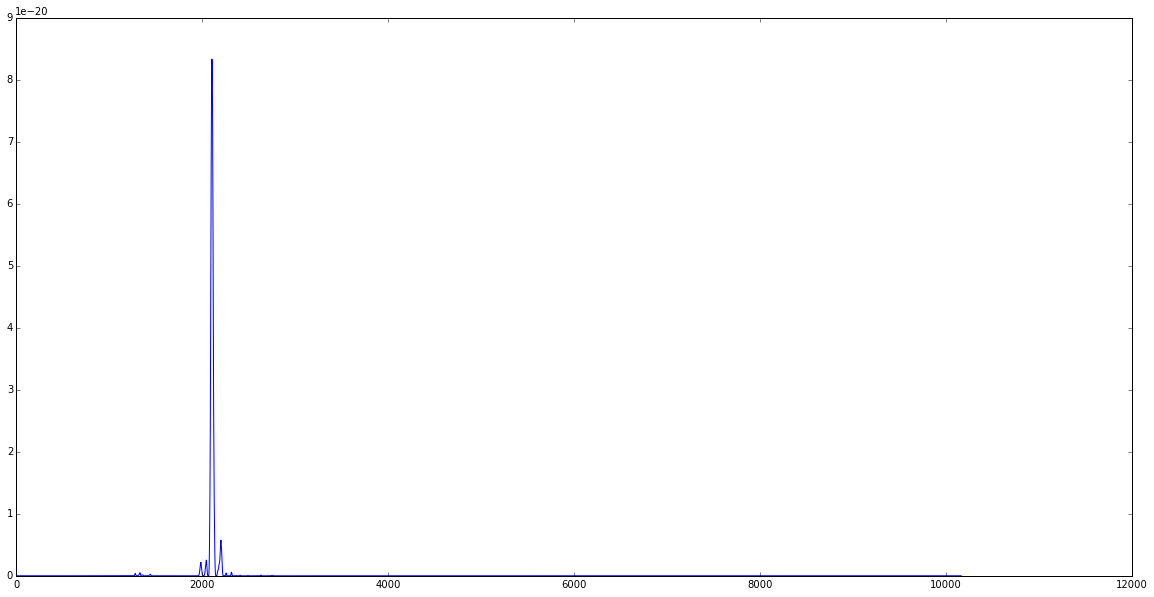

In [285]:
e = SeismicEvent.evento("../data-sets/2011_apr_10_07_52")
ss = e.seismograms[7]
u = np.array([ss.X_coord, ss.Y_coord, ss.Z_coord])

#analisis de componentes principales del sismo para encontrar los mejores candidatos para 
#la estimación del epicentro

pca = PCA()
pca.fit(ss.raw_data**2)
seis_transform = pca.transform(ss.raw_data**2)

plt.figure(figsize=(20,10))
energy = np.cumsum(seis_transform[:,0]**2 + seis_transform[:,1]**2 + seis_transform[:,2]**2)
plt.plot(np.diff(energy))

#plt.figure()
#plt.plot(energy)

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(ss.data[:,2])
ax2.plot(ss.data[:,3])
ax3.plot(ss.data[:,4])

In [ ]:
#descomposicion ortgonal
covariance_matrix = cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

In [ ]:
ss.data[:, 2:5]

In [104]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

importado!


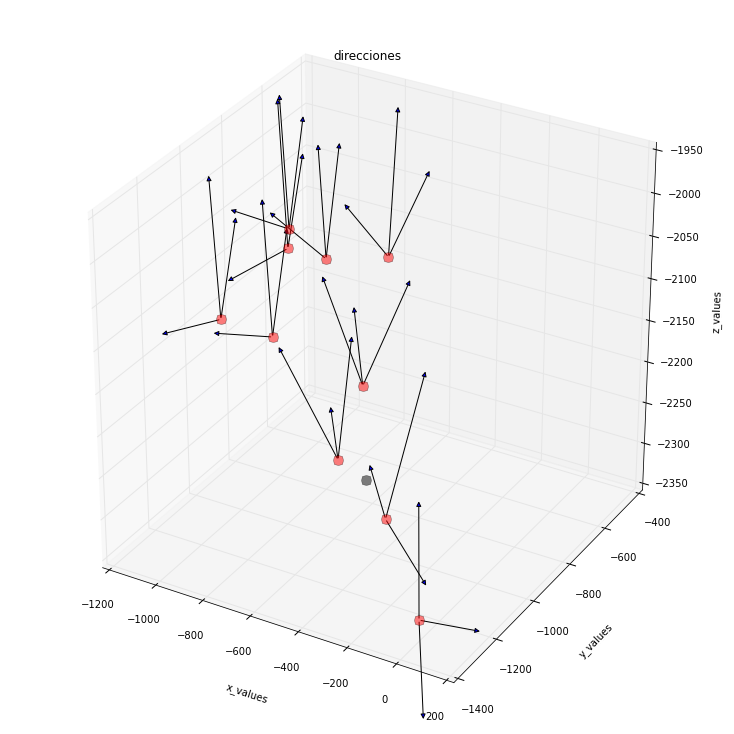

In [110]:
%matplotlib inline

import matplotlib as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
import numpy as np
import numpy.linalg as ln
import scipy as sp
import pandas as pd
#libreria sismica
from seismic_source import SeismicEvent, Source

# Dibujar vectores
e = SeismicEvent.evento("./../data-sets/1998_aug_09_21_49_22.4n3")

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

#estimacion del epicentro
plt.plot([e.LocX], [e.LocY], [e.LocZ], 'o', markersize=10, color='black', alpha=0.5)

for i, ss in enumerate(e.seismograms):

    #descomposicion ortgonal de la señal
    covariance_matrix = ss.data.cov()
    eig_val, eig_vec = ln.eig(covariance_matrix)

    #ubicacion del sensor
    X_coord, Y_coord, Z_coord  = (ss.X_coord, ss.Y_coord, ss.Z_coord)
 
    #graficar las direcciones
    plt.plot([X_coord], [Y_coord], [Z_coord], 'o', markersize=10, color='red', alpha=0.5)
    n = 200
    for v in eig_vec:
    
        a = Arrow3D([X_coord, X_coord + n*v[0]], 
                    [Y_coord, Y_coord + n*v[1]], 
                    [Z_coord, Z_coord + n*v[2]], mutation_scale=10, arrowstyle="-|>")
        ax.add_artist(a)        
    
    ax.set_xlabel('x_values')
    ax.set_ylabel('y_values')
    ax.set_zlabel('z_values')
    plt.draw()
    
plt.title('direcciones')

In [ ]:
#descomposicion ortgonal

ss = e.seismograms[14]
covariance_matrix = np.cov(cumsum(ss.data[:, 2:5], axis=1), rowvar=0)
eig_val, eig_vec = ln.eig(covariance_matrix)

# verificar que la matriz sea simetrica y que el cambio de base produzca
# covarianza cero entre las 3 se~nales retornar el cambio de dase
rot = np.dot(cumsum(ss.data[:, 2:5], axis=1), eig_vec)

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(rot[:,0])
ax2.plot(rot[:,1])
ax3.plot(rot[:,2])

Resultado principal
==
Mediante este método la estimación del epicentro sísmico de obtiene

In [ ]:
X_coord

In [ ]:
v[0]